# Advanced Methods in Data Analysis

# Projec 1 - Grupo 8

## Integrantes

Laura Gutierrez Código 201015209

Fernando Bautista Código 202027865

Fredi Baron Código 202027522

Ingrid Hernández Código 202028041

In [1]:
import os
import pandas as pd
# import sqlalchemy as db
import numpy as np 
import csv
# import sqldf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Series Analysis

#### 1. Choosing your time series

La serie que decidimos escoger se denomina 'Tasa de desempleo en Colombia', es una serie de periodicidad mensual, con información correspondiente entre los periodos 'Enero 2001' y 'Mayo 2021', para un total de 245 datos, como se puede ver a continuación: 

In [2]:
serie = pd.read_excel('1.1.1.EMP_Total nacional IQY1.xlsx')

In [3]:
serie.head(10)

,Periodo,Tasa de desempleo (%)
0,2001-01,16.694680
1,2001-02,17.307023
2,2001-03,15.705056
3,2001-04,14.589864
4,2001-05,14.226299
5,2001-06,15.232044
6,2001-07,15.021908
7,2001-08,14.707637
8,2001-09,14.280508
9,2001-10,14.585483


#### 2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

La serie de tiempo que proponemos analizar corresponde a la tasa de desempleo en Colombia. Dicha serie es calculada por el Departamento Administrativo Nacional de Estadística (DANE) generando mediante un indicador mensual la evolución en el tiempo de la proporción de personas que, estando en edad de trabajar y teniendo la intención de trabajar, no se puedan emplear.La información de los indicadores mensuales se pueden ver a continuación:

In [4]:
serie = serie.rename(columns = {'Periodo':'ds'})
serie
serie.ds = pd.to_datetime(serie.ds)
serie.set_index('ds', inplace=True)

<AxesSubplot:xlabel='ds'>

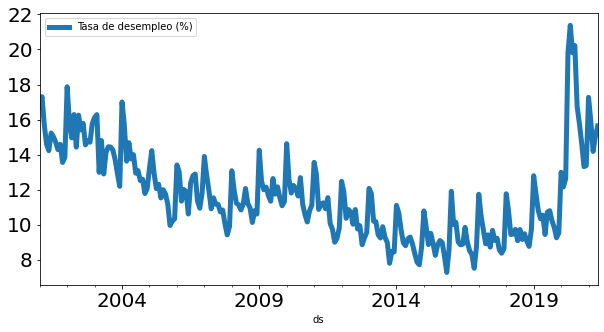

In [5]:
serie.plot(figsize=(10,5), linewidth=5, fontsize=20)

Es importante analizar esta serie, ya que el comportamiento general de la tasa de desempleo ha presentado valores fluctuantes regularmente similares con una tendencia a la baja en los últimos veinte años. El año pasado (2020) presento un fuerte cambio a causa del efecto generado por la pandemia del COVID-19, lo cual afecto el comportamiento histórico de la serie mostrando niveles nunca antes alcanzados, muy diferentes a los presentados anteriormente.

Los efectos sociales y económicos de este cambio son muy fuertes a nivel país, ya que su aumento es inversamente proporcional al crecimiento económico del país, ya que al aumentar la tasa de desempleo el consumo general disminuye. Es por esto que las estimaciones de la tasa de desempleo resultan fundamentales, ya que al saber cómo se puede comportar esta variable en el futuro, se pueden tomar diferentes decisiones económicas a corto, mediano y largo plazo que contribuyan al crecimiento económico del país.

#### 3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

Para identificar y caracterizar la serie de la tasa de desempleo, realizamos el siguiente analisis.



Primero identificamos la tendencia como se puede ver a continuación.

In [6]:
serie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2001-01-01 to 2021-05-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tasa de desempleo (%)  245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


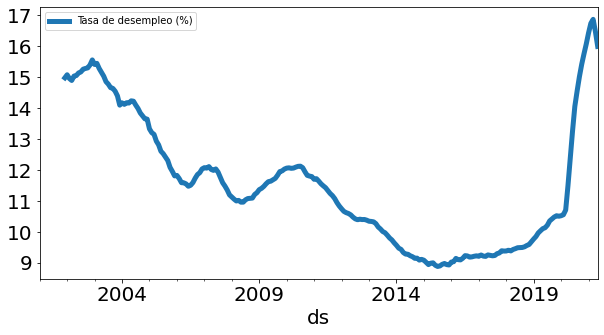

In [7]:
serie.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('ds', fontsize=20);

En la grafica anterior se puede observar la tendencia de la serie, como al inicio presentaba una tendencia decreciente hasta el año 2015 y luego empezo a incrementar los valores de forma gradual, terminando con un crecimiento fuerte por el efecto de la pandemia.

Luego, analizamos la tendencia de los diferentes meses (Enero, Julio, Diciembre) donde al parecer ocurre un cambio periodico en la serie de forma individual, como se puede ver a continuación:

In [8]:
serie_mes = pd.read_excel('1.1.1.EMP_Total nacional IQY2.xlsx')
serie_mes.head(10)

,Year,Enero,Julio,Diciembre
0,2001,16.694680,15.021908,13.839317
1,2002,17.872714,15.408296,15.772977
2,2003,16.115079,14.443364,12.185562
3,2004,17.003073,12.940044,12.070743
4,2005,13.218313,11.996086,10.334385
5,2006,13.408460,12.389135,11.782755
6,2007,13.895297,11.159513,9.893868
7,2008,13.079032,12.063831,10.606808
8,2009,14.248579,12.632061,11.311487
9,2010,14.623078,12.684422,11.120036


In [9]:
serie_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       21 non-null     int64  
 1   Enero      21 non-null     float64
 2   Julio      20 non-null     float64
 3   Diciembre  20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 800.0 bytes


In [10]:
serie_mes['Year']=serie_mes['Year'].map(str)

In [11]:
serie_mes.Year = pd.to_datetime(serie_mes.Year)
serie_mes.set_index('Year', inplace=True)
serie_mes.head()

,Enero,Julio,Diciembre
Year,,,
2001-01-01,16.694680,15.021908,13.839317
2002-01-01,17.872714,15.408296,15.772977
2003-01-01,16.115079,14.443364,12.185562
2004-01-01,17.003073,12.940044,12.070743
2005-01-01,13.218313,11.996086,10.334385


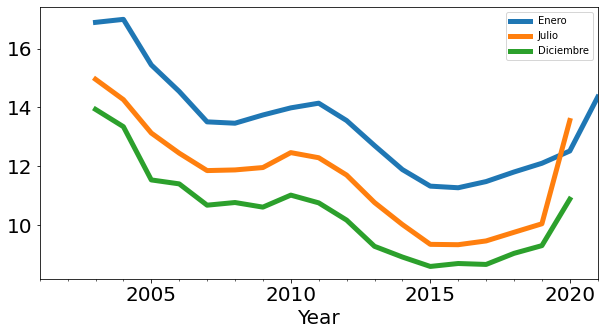

In [12]:
serie_mes[['Enero', 'Julio','Diciembre']].rolling(3).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

En la gráfica anterior se puede observar la tendencia trimestral de los meses (Enero, Julio, Diciembre) al parecer presenta un comportamiento estacional ya que por el gap presentado de cada mes, la diferencia es casi constante, lo cual confirma que en esos mese existe un pico en el comportamiento. Es decir, en Enero ocurre el valor más alto del año, en diciembre el valor menor del año y en Julio un valor intermedio, lo anterior es lógico debido a las dinámicas económicas del mercado. De igual manera, se observa como en el año 2020 los niveles se incrementaron significativamente.

Despues analizamos el comportamiento de la estacionalidad de la serie con el test de Dickey Fuller

In [13]:
result = adfuller(serie['Tasa de desempleo (%)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.735220
p-value: 0.413063
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


El test anterior nos permite asegurar que la serie no es estacionaria, ya que el p-value es mayor a 0,05 rechazando la hipoteis nula. 

Para corregir el problema de la estacionalidad decidimos realizar una diferenciación en la serie original para posteriormente volver a probar el test de Dickey Fuller, como se muestra a continuación:

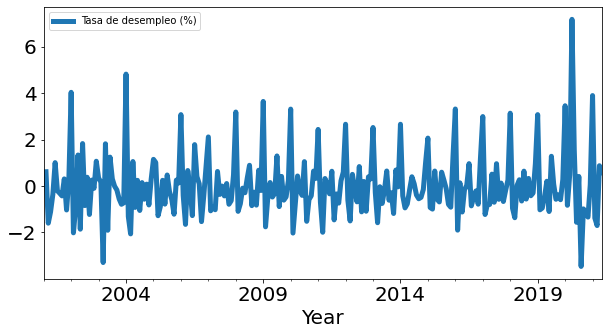

In [14]:
serie.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

La grafica anterior nos muestra a la serie original diferenciada una vez, corroborando los picos de generados en el mes de enero. Ahora con esta nueva serie le aplicaremos el test.

In [15]:
result = adfuller(serie['Tasa de desempleo (%)'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.622980
p-value: 0.000117
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


El test anterior nos permite asegurar que la serie es estacionaria, ya que el p-value es menor a 0,05 aceptando la hipoteis nula.

Por ultimo analizaremos la correlación de la serie con sus valores rezagados teniendo en cuenta la periodicidad.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

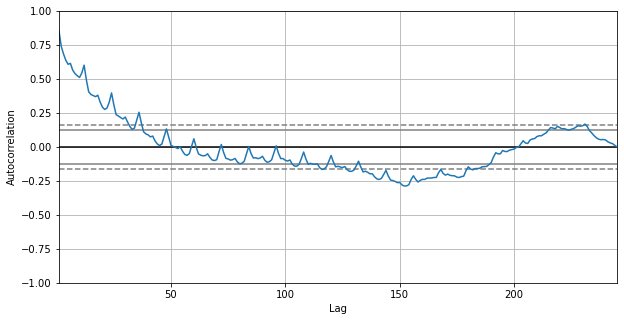

In [16]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(serie)

Le realizamos un zoom a los primeros 60 registros para verificar la peridicidad de 12 meses.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

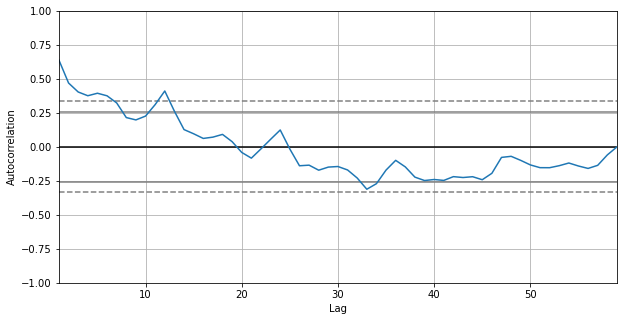

In [17]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(serie.iloc[0:59,:])

En la grafica anterior se puede observar como cada doce meses ocurre un pico en la serie, esto se puede evidencias en los periodos 12, 24, 36, 48, y 60 meses.

#### 4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

Para realizar las predicciones utilizaremos los modelos ARIMA, los cuales tienen como parametros (p, d, q), estos hacen referencia al orden del operador autorregresivo, el grado de diferenciación y el promedio móvil no estacional

Es necesario realizar el correlograma de autocorrelacion normal ACF.

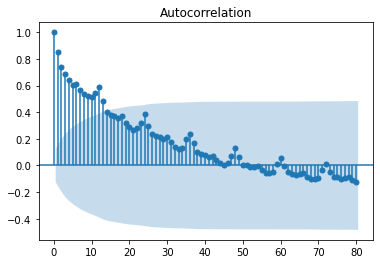

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(serie.iloc[1:], lags=80);

Se puede observar como el decrecimiento es de forma suave, induciendo a estimar un modelo autoregresivo.

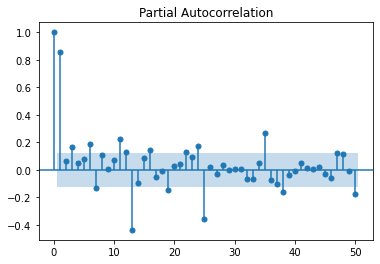

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(serie.iloc[1:], lags=50);

Se puede observar como el decrecimiento es de forma abrupta, induciendo a estimar un modelo autoregresivo.

Teniendo en cuenta lo anterior, vamos a generar diferentes modelos buscando un mejor pronóstico de la serie para los siguientes 12 meses

In [20]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(serie, order=(15,1,0))
model_fit = model.fit(disp=0)
##print(model_fit.summary())

In [21]:
X = serie.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

In [22]:
model = ARIMA(history, order=(15,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

In [23]:
model = ARIMA(history, order=(15,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 27.825


In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

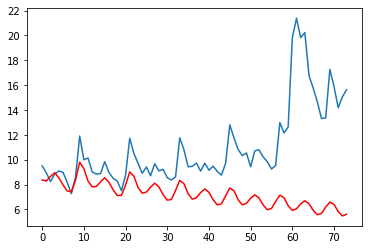

In [25]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Aunque el modelo identifica la estacionalidad no logra capturar el cambio de tendencia abrupto que se evidencia en los últimos periodos debido a la pandemia

In [26]:
model = ARIMA( serie, order=(3,2,0))
model_fit = model.fit(disp=0)

In [27]:
X = serie.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

In [28]:
model = ARIMA(history, order=(3,2,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

In [29]:
model = ARIMA(history, order=(3,2,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 9.283


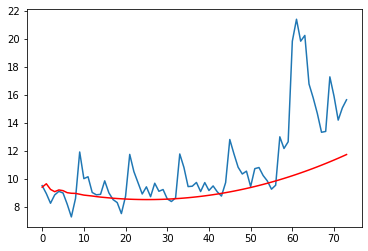

In [30]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

A diferencia del modelo anterior, el modelo ARIMA(3,2,0) logra identificar el cambio en la tendencia de los últimos meses pero no captura la estacionalidad que caracteriza la serie

A continuación, implementaremos el procedimiento de pronóstico Prophet:

In [31]:
df = pd.read_excel('1.1.1.EMP_Total nacional IQY1.xlsx')
df = df.rename(columns = {'Periodo':'ds'})
df = df.rename(columns = {'Tasa de desempleo (%)':'y'})
df.ds = pd.to_datetime(df.ds)

In [32]:
df.head()

,ds,y
0,2001-01-01,16.694680
1,2001-02-01,17.307023
2,2001-03-01,15.705056
3,2001-04-01,14.589864
4,2001-05-01,14.226299


In [33]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(df)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
#Creación del df de los siguientes 12 meses
future2 = m.make_future_dataframe(periods=12, freq='M')
future2['ds'] = future2['ds'].to_numpy().astype('datetime64[M]')
future2.tail()

,ds
252,2021-12-01
253,2022-01-01
254,2022-02-01
255,2022-03-01
256,2022-04-01


In [35]:
forecast2 = m.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
252,2021-12-01,14.568619,13.089125,16.205554
253,2022-01-01,17.471270,15.841162,18.982689
254,2022-02-01,16.737881,15.149596,18.271977
255,2022-03-01,15.735665,14.115816,17.326694
256,2022-04-01,16.158733,14.670939,17.574134


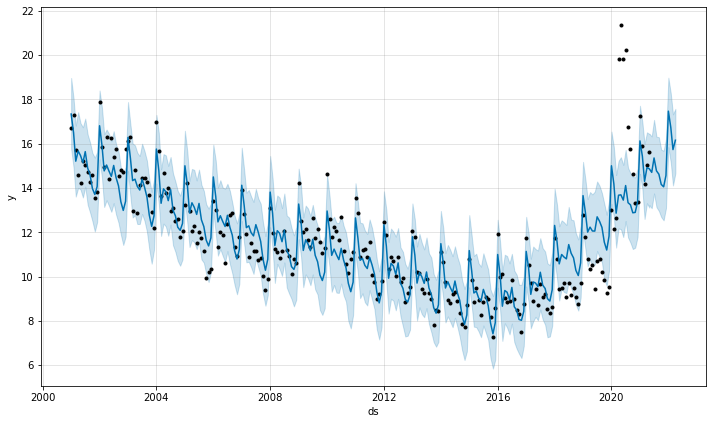

In [36]:
fig2 =m.plot(forecast2)

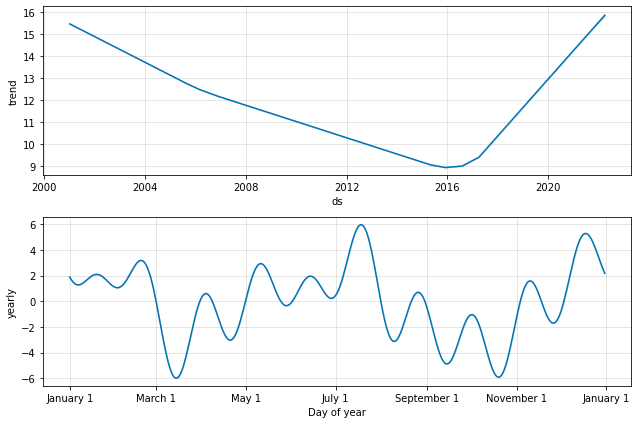

In [37]:
m.plot_components(forecast2);

Este modelo captura tanto la tendencia como la estacionalidad de la serie

## Conclusiones

1. Al implementar el procedimiento de pronóstico Prophet, se evidencia un mejor pronóstico de los siguientes 12 periodos ya que logra captuar el cambio de la tendiencia en los últimos periodos de la serie, así como la estacionalidad que la caracteriza en los meses de enero y diciembre


2. Teniendo en cuenta el procedimiento Prophet la tasa de desempleo tendería a crecer manteniendo los picos en enero y caídas en diciembre, sin embargo, esta estimación va encontra de la reactivación del comercio que se está evidenciando a medida que las alcaldías quitan las restricciones y el proceso de vacunación avanza, lo cual podría hacer que la tasa de desempleo comience a volver a sus niveles previos a la pandemia.


3. Los modelos ARIMA no logran captar el cambio de tendencia presentado en los últimos periodos de la serie por lo cual su estimación/predicción es muy limitada ya que al parecer estos modelos identifican ese cambio como un cambio estructural


4. Se recomientda el ajuste del modelo estacional SARIMA (Seasonal Auto Regresive Integrated Moving Average), que es una extensión de los modelos ARIMA y se diferencian porque incorpora el componente estacional.